## Quantumpedia Project: Explain QFT and Shor's Algorithm

## Aurthor Information: Louis Chen

### PhD Candidate in Quantum Devices & Algorithm | IBM Qiskit Advocate| 
### Mentor@QIntern & qosf | Data Scientist | Founder of Quantumpedia

### https://www.linkedin.com/in/louis-chen-801214109/

### https://quantumpedia.uk

QFT:

https://quantumpedia.uk/quantum-algorithm-1-shors-algorithm-for-factorization-part-1-cffcb4f0d0c1

Shor's Algorithm:

https://quantumpedia.uk/quantum-algorithm-1-shors-algorithm-for-factorization-part-2-a4f1090d633a

### IBM Q Default Library Import

In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## QFT Code

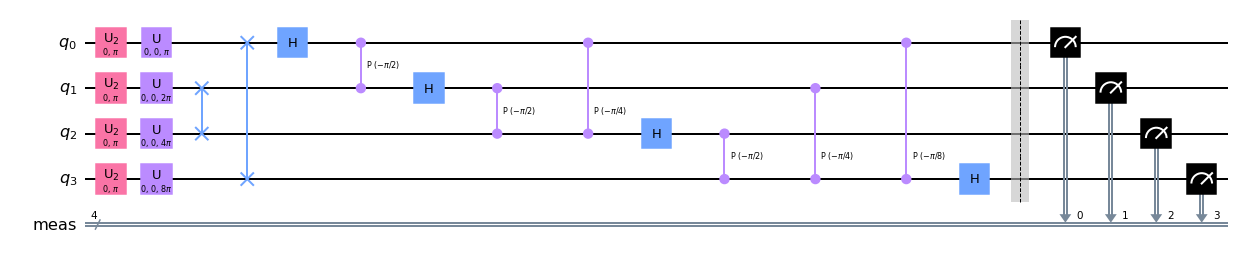

In [4]:
# import numpy
import numpy as np
from numpy import pi
import math
# importing Qiskit
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector

# define functions for generating QFT
def qft_rotations(circuit, n):  
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)

def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

def inverse_qft(circuit, n):
    """Does the inverse QFT on the first n qubits in circuit"""
    # First we create a QFT circuit of the correct size:
    qft_circ = qft(QuantumCircuit(n), n)
    # Then we take the inverse of this circuit
    invqft_circ = qft_circ.inverse()
    # And add it to the first n qubits in our existing circuit
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose() # .decompose() allows us to see the individual gates

# number of qubit is defined by our encoding number with the relationship of 2^n
# for example : encoding number <8 , 2^3 = 8 , so # qubits = 3

# Solving number:
number = 16

nqubits = math.ceil(math.log2(number))

qc = QuantumCircuit(nqubits)

for qubit in range(nqubits):
    qc.h(qubit)
    
for qubit in range(nqubits):
    qc.p(number*pi/(2**(nqubits-qubit)),qubit)

qc = inverse_qft(qc, nqubits)
qc.measure_all()
qc.draw()

### QFT Result

In [33]:
bin(16)

'0b10000'

ibmqfactory.load_account:WARNING:2023-02-15 00:21:14,353: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_manila
Job Status: job has successfully run


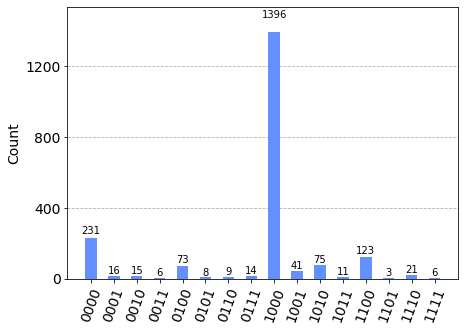

In [34]:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to nqubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= nqubits 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)

shots = 2048
transpiled_qc = transpile(qc, backend, optimization_level=3)
job = backend.run(transpiled_qc, shots=shots)
job_monitor(job)

counts = job.result().get_counts()
plot_histogram(counts)

In [17]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backends = provider.backends()
for backend in backends:
    print("Backend name:", backend.name())
    print("Number of qubits:", backend.configuration().n_qubits)
    print("Is simulator:", backend.configuration().simulator)
    print("Is operational:", backend.status().operational)
    print()

ibmqfactory.load_account:WARNING:2023-02-15 10:34:49,529: Credentials are already in use. The existing account in the session will be replaced.


Backend name: ibmq_qasm_simulator
Number of qubits: 32
Is simulator: True
Is operational: True

Backend name: ibmq_lima
Number of qubits: 5
Is simulator: False
Is operational: True

Backend name: ibmq_belem
Number of qubits: 5
Is simulator: False
Is operational: True

Backend name: ibmq_quito
Number of qubits: 5
Is simulator: False
Is operational: True

Backend name: simulator_statevector
Number of qubits: 32
Is simulator: True
Is operational: True

Backend name: simulator_mps
Number of qubits: 100
Is simulator: True
Is operational: True

Backend name: simulator_extended_stabilizer
Number of qubits: 63
Is simulator: True
Is operational: True

Backend name: simulator_stabilizer
Number of qubits: 5000
Is simulator: True
Is operational: True

Backend name: ibmq_manila
Number of qubits: 5
Is simulator: False
Is operational: True

Backend name: ibm_nairobi
Number of qubits: 7
Is simulator: False
Is operational: True

Backend name: ibm_oslo
Number of qubits: 7
Is simulator: False
Is operatio

## Shor Algorithm Code

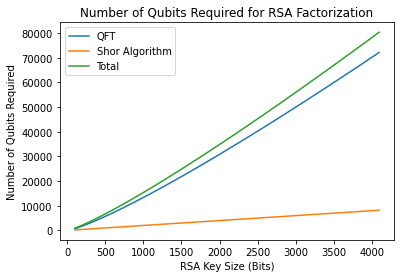

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function
def rsa_qubits(x):
    return x*np.log(x)*np.log(np.log(x))

# Generate x values
x = np.linspace(100, 4096, 200)

# Calculate y values
y = rsa_qubits(x)

# Calculate the number of qubits required for Shor's algorithm
y_shor = 2*x

# Calculate the total number of qubits required
y_sum = x*np.log(x)*np.log(np.log(x)) + 2*x

# Create a plot
fig, ax = plt.subplots()
ax.plot(x, y, label='QFT')
ax.plot(x, y_shor, label='Shor Algorithm')
ax.plot(x, y_sum, label='Total')

# Set plot title, legend, and axis labels
ax.set_title('Number of Qubits Required for RSA Factorization')
ax.set_xlabel('RSA Key Size (Bits)')
ax.set_ylabel('Number of Qubits Required')
ax.legend()

# Show the plot
plt.show()


In [36]:
# Import required libraries
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile, assemble
from math import gcd
from numpy.random import randint
from fractions import Fraction

# Set the value of N for factorization
N = 15

# Generate a random number between 2 and N-1
a = randint(2, 15)
print(f"Chosen random number: {a}")

# Check if the chosen random number shares any factors with N other than 1
if gcd(a, N) != 1:
    print("Chosen random number shares a factor with N. Try again.")
else:
    # Define the controlled multiplication by a mod 15 circuit
    def c_amod15(a, power):
        """Controlled multiplication by a mod 15"""
        # Check if a is valid
        if a not in [2,4,7,8,11,13]:
            raise ValueError("'a' must be 2,4,7,8,11 or 13")
        # Define the circuit for a single iteration
        U = QuantumCircuit(4)
        if a in [2,13]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a in [7,8]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [4, 11]:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
        U = U.to_gate()
        U.name = f"{a}^{power} mod 15"
        c_U = U.control()
        return c_U

    # Define the inverse Quantum Fourier Transform circuit
    def qft_dagger(n):
        """n-qubit QFTdagger the first n qubits in circ"""
        qc = QuantumCircuit(n)
        # Swap qubits to reverse the order of the bitstring
        for qubit in range(n//2):
            qc.swap(qubit, n-qubit-1)
        # Apply the controlled phase shift gates
        for j in range(n):
            for m in range(j):
                qc.cp(-np.pi/float(2**(j-m)), m, j)
            qc.h(j)
        qc.name = "QFT†"
        return qc

    # Define the quantum phase estimation algorithm for a
    def qpe_amod15(a):
        # Set the number of counting qubits to 8
        n_count = 8

        # Create a quantum circuit with 4 qubits for the modular multiplication operation and n_count qubits for the QPE algorithm
        qc = QuantumCircuit(4+n_count, n_count)

        # Apply Hadamard gates to the first n_count qubits
        for q in range(n_count):
            qc.h(q)

        # Apply X gate to the auxiliary qubit
        qc.x(3+n_count)

        # Apply the controlled modular multiplication operation for each power of 2 up to n_count
        for q in range(n_count):
            qc.append(c_amod15(a, 2**q), [q] + [i+n_count for i in range(4)])

        # Apply the inverse Quantum Fourier Transform to the first n_count qubits
        qc.append(qft_dagger(n_count), range(n_count))

        # Measure the first n_count qubits
        qc.measure(range(n_count), range(n_count))
        # Simulate Results
        aer_sim = Aer.get_backend('aer_simulator')
        # Setting memory=True below allows us to see a list of each sequential reading
        t_qc = transpile(qc, aer_sim)
        qobj = assemble(t_qc, shots=1)
        result = aer_sim.run(qobj, memory=True).result()
        readings = result.get_memory()
        print("Register Reading: " + readings[0])
        phase = int(readings[0],2)/(2**n_count)
        print("Corresponding Phase: %f" % phase)
        return phase


Chosen random number: 2


In [37]:

phase = qpe_amod15(a) # Phase = s/r
Fraction(phase).limit_denominator(15) # Denominator should (hopefully!) tell us r

frac = Fraction(phase).limit_denominator(15)
s, r = frac.numerator, frac.denominator
print(r)

guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
print(guesses)

a = 7
factor_found = False
attempt = 0
while not factor_found:
    attempt += 1
    print("\nAttempt %i:" % attempt)
    phase = qpe_amod15(a) # Phase = s/r
    frac = Fraction(phase).limit_denominator(N) # Denominator should (hopefully!) tell us r
    r = frac.denominator
    print("Result: r = %i" % r)
    if phase != 0:
        # Guesses for factors are gcd(x^{r/2} ±1 , 15)
        guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
        print("Guessed Factors: %i and %i" % (guesses[0], guesses[1]))
        for guess in guesses:
            if guess not in [1,N] and (N % guess) == 0: # Check to see if guess is a factor
                print("*** Non-trivial factor found: %i ***" % guess)
                factor_found = True

Register Reading: 00010100
Corresponding Phase: 0.078125
13
[3, 5]

Attempt 1:
Register Reading: 00001010
Corresponding Phase: 0.039062
Result: r = 15
Guessed Factors: 3 and 1
*** Non-trivial factor found: 3 ***


In [12]:
import qiskit.tools.jupyter
%qiskit_version_table

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
